In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
!pip install statsmodels --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.datasets import airpassengers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Download data for the last 5 years
df = yf.download('GOOG', start='2019-01-01', end='2024-12-31')

# Use the 'Close' price for forecasting
data = df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0324 - val_loss: 0.0019
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0

In [ ]:
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i+time_step])  # Input sequence (past 'time_step' days)
        y.append(dataset[i+time_step])  # Output (price on the next day)
    return np.array(X), np.array(y)

time_step = 30  # Number of past days to use for prediction
X, y = create_dataset(scaled_data, time_step)

In [ ]:
# Reshape to [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
train_size = int(len(X) * 0.8)  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(time_step, 1)), # LSTM layer with 128 units
    Dropout(0.2),  # Dropout for regularization
    LSTM(64),  # Another LSTM layer with 64 units
    Dropout(0.2),
    Dense(1)  # Output layer with 1 unit (predicted price)
])

model.compile(loss='mean_squared_error', optimizer='adam')  # Compile the model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0230 - val_loss: 0.0026
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - val_loss: 0.0043
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_loss: 0.0068
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 10/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 11/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 12/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - va

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


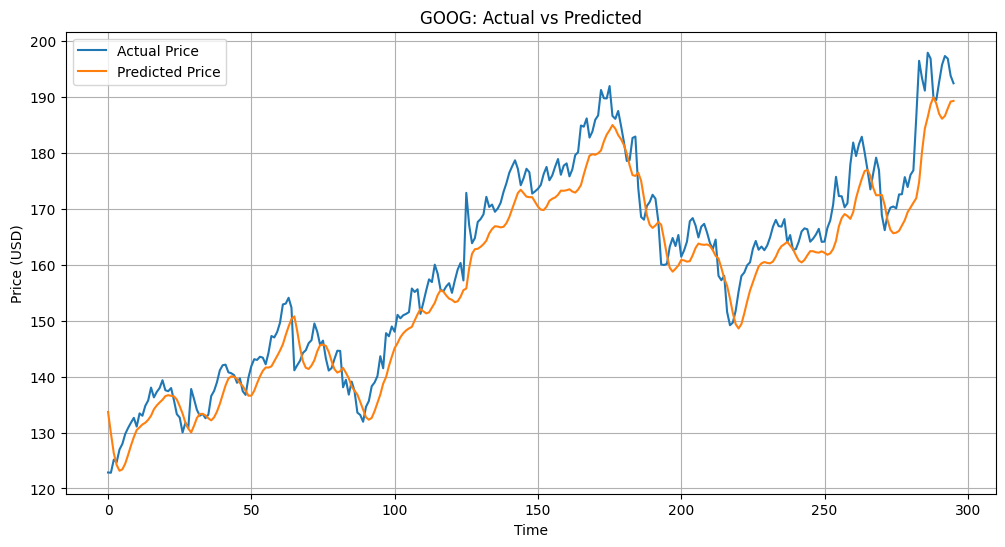

In [ ]:
predicted = model.predict(X_test)  # Predict on the test set

# Inverse transform to get actual prices
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predicted)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('GOOG: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━

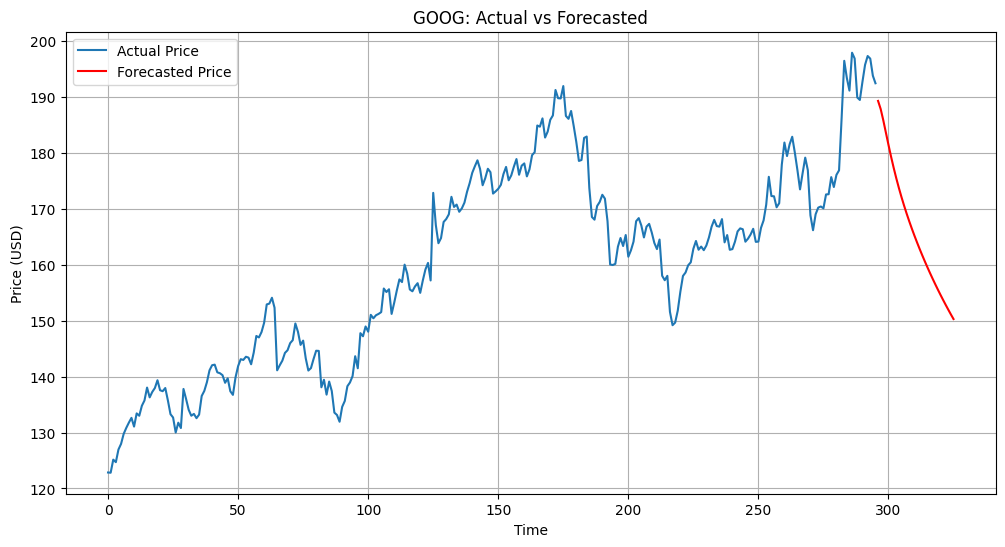

In [ ]:
# Step 1: Number of future steps to forecast
forecast_steps = 30  # Let's forecast for the next 30 days

# Step 2: Get the last sequence from the test data (or train data)
last_sequence = X_test[-1]  # Taking the last sequence from the test set

# Step 3: Forecast future values
forecasted_values = []
current_input = last_sequence.reshape(1, time_step, 1)  # Reshape to match model input

for _ in range(forecast_steps):
    # Predict the next value
    next_value = model.predict(current_input)
    forecasted_values.append(next_value[0][0])  # Append the predicted value

    # Update the input for the next prediction (append the predicted value and shift the sequence)
    # Reshape the next_value to match the shape of current_input
    next_value = next_value.reshape(1, 1, 1)
    current_input = np.append(current_input[:, 1:, :], next_value, axis=1)

# Step 4: Inverse scale the forecasted values to get actual prices
forecasted_prices = scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1))

# Step 5: Plot the forecasted values along with the actual values
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(np.arange(len(actual_prices), len(actual_prices) + forecast_steps),
         forecasted_prices, label='Forecasted Price', color='red')
plt.title('GOOG: Actual vs Forecasted')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

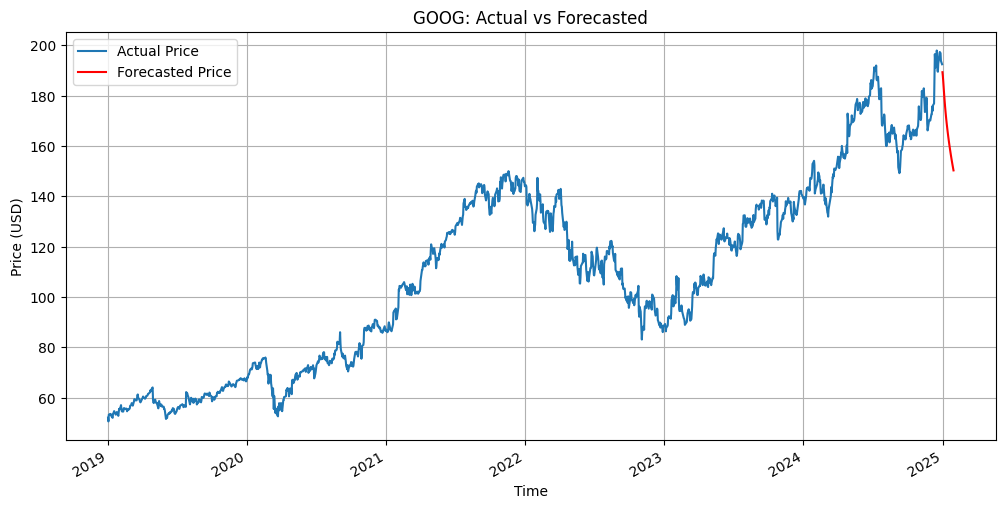

In [ ]:
import matplotlib.dates as mdates
from datetime import timedelta

# ... (previous code for model training and forecasting) ...

# Get the last date in the actual data
last_date = data.index[-1]

# Generate date range for forecasted values
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_steps + 1)]

# Convert forecast_dates to matplotlib dates
forecast_dates_mpl = mdates.date2num(forecast_dates)

# Plot the forecasted values along with the actual values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['Close'], label='Actual Price')
ax.plot(forecast_dates_mpl, forecasted_prices, label='Forecasted Price', color='red')
ax.set_title('GOOG: Actual vs Forecasted')
ax.set_xlabel('Time')
ax.set_ylabel('Price (USD)')

# Format x-axis to show year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()  # Rotate x-axis labels for better readability

ax.legend()
ax.grid()
plt.show()

ModuleNotFoundError: No module named 'statsmodels.tsa.datasets'

In [ ]:
!pip install tensorflow-datasets --quiet